<a href="https://colab.research.google.com/github/romangasp/machine-learning/blob/main/ImageClassificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.6QMJTH_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.6QMJTH_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
data_training, data_test = data['train'], data['test']

In [ ]:
classes_names = metadata.features['label'].names

In [ ]:
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Normalize the data (Pass from 0-255 to 0-1)
def normalize(images, labels):
  images= tf.cast(images, tf.float32)
  images /= 255 #Here pass from 0-255 to 0-1
  return images, labels

#Normalize the training data and data test with the function that we do
data_training = data_training.map(normalize)
data_test = data_test.map(normalize)

#Add to cache (use memory instead the place on the disk, the training is more fast)
data_training = data_training.cache();
data_test = data_test.cache();

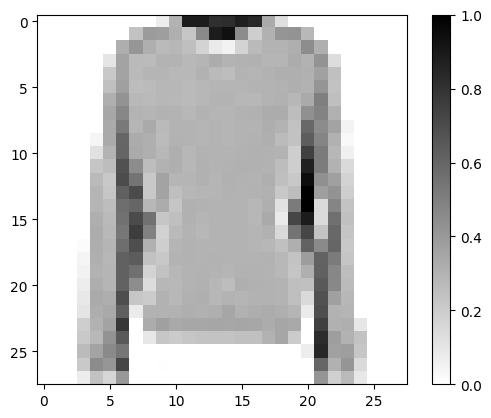

In [ ]:
#Show the data training images, just we show the fisrt
for image, label in data_training.take(1):


  image = image.numpy().reshape((28,28)); #redimensionate the image
  import matplotlib.pyplot as plt

  #draw
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

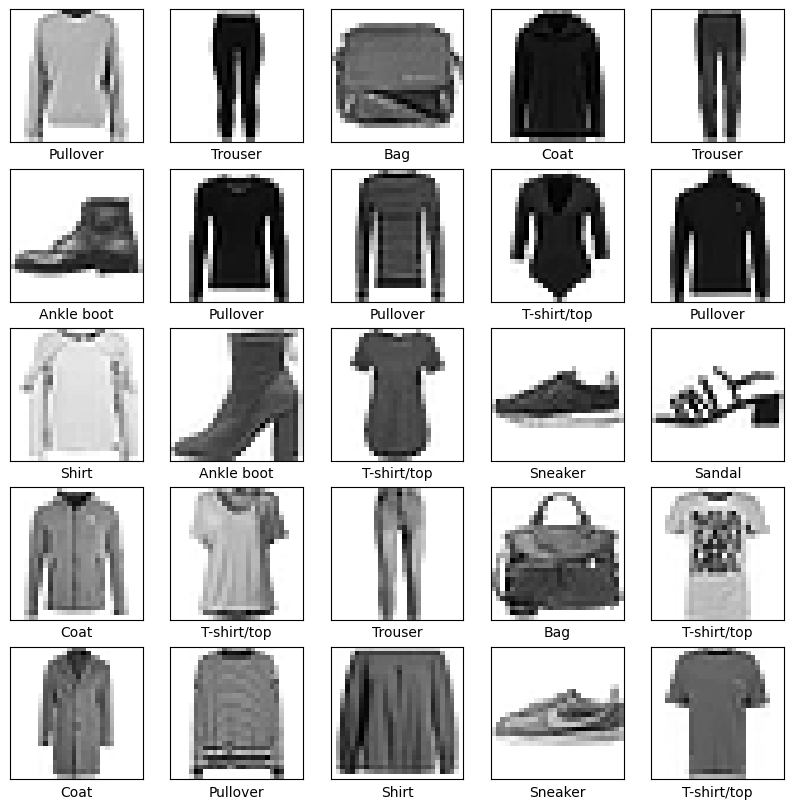

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data_training.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(classes_names[label])
plt.show()

In [ ]:
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 black and white
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Para redes de clasificacion
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the model
model.compile(
    optimizer ='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
num_ex_training = metadata.splits['train'].num_examples
num_ex_test = metadata.splits['test'].num_examples


In [ ]:
print(num_ex_training)
print(num_ex_test)

60000
10000


In [ ]:
BATCH_SIZE = 32
data_training = data_training.repeat().shuffle(num_ex_training).batch(BATCH_SIZE);
data_test = data_test.batch(BATCH_SIZE);

In [ ]:
import math
#training
historial = model.fit(data_training, epochs=5, steps_per_epoch=math.ceil(num_ex_training/BATCH_SIZE) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7561 - loss: 0.6986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8550 - loss: 0.4015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8706 - loss: 0.3551
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8779 - loss: 0.3350
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8869 - loss: 0.3051


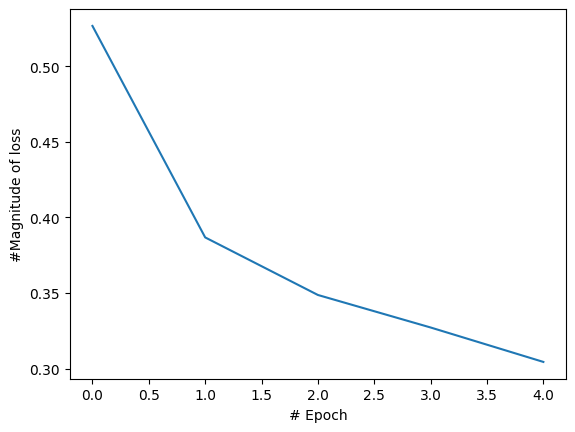

In [ ]:
#Result of loss functions in each epoch

plt.xlabel("# Epoch")
plt.ylabel("#Magnitude of loss")
plt.plot(historial.history["loss"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


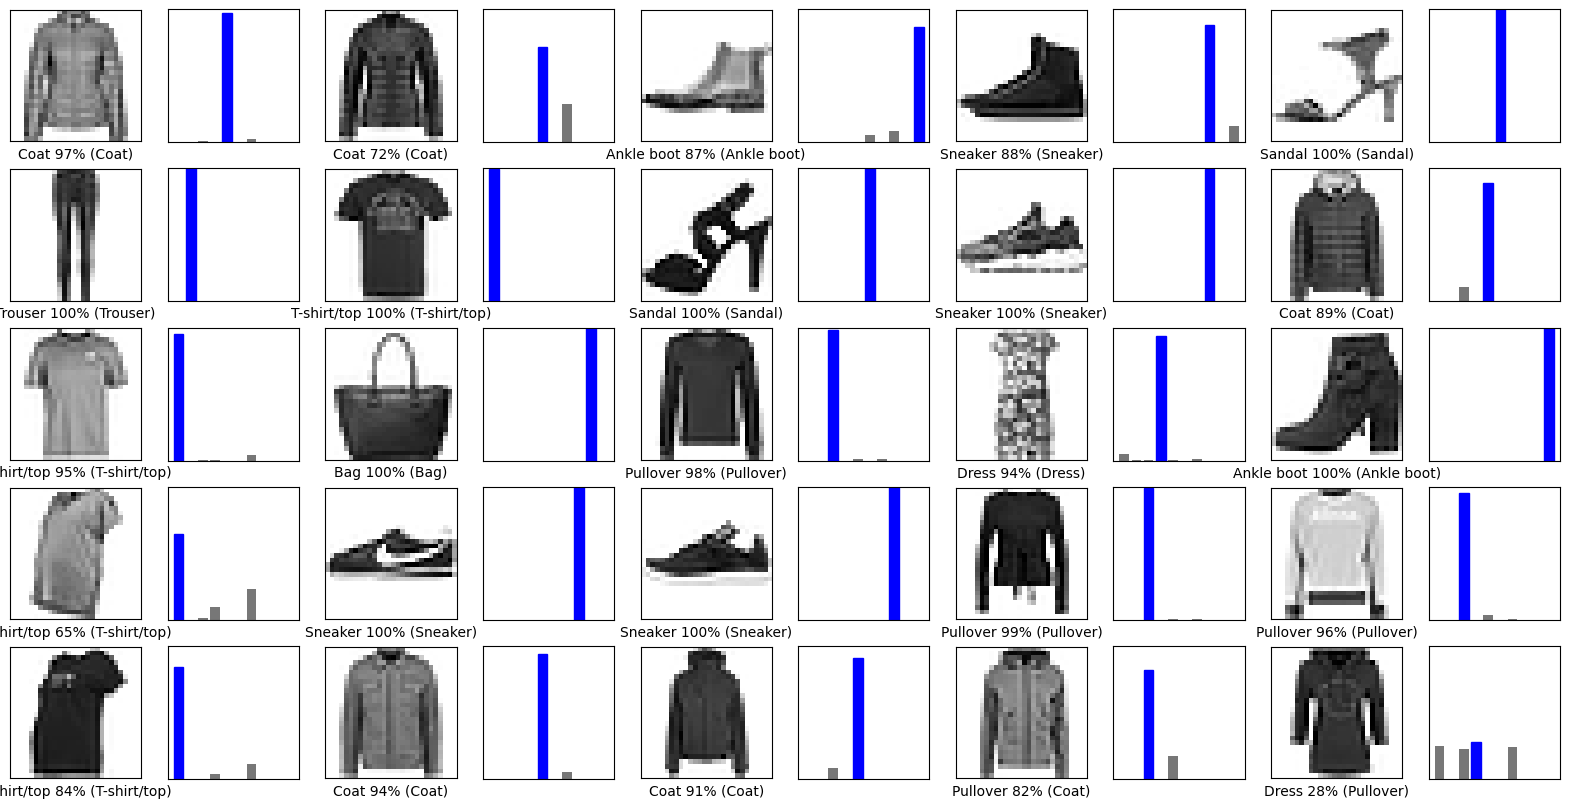

In [ ]:
import numpy as np

for test_images, test_labels in data_test.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(data_test)

def graph_image(i, arr_predictions, real_labels, images):
  arr_prediction = arr_predictions[i],
  # real_label = real_labels[i],
  img = images[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  prediction_label = np.argmax(arr_prediction)
  if prediction_label == real_labels[i]:
    color= 'blue' #if you did it well
  else:
    color= 'red' #if you didn't well

  plt.xlabel("{} {:2.0f}% ({})".format(
        classes_names[prediction_label],
        100*np.max(arr_prediction),
        classes_names[real_labels[i]],
        color=color
    ))


def graph_array_value(i, arr_predictions, real_label) :
    arr_predictions, real_label = arr_predictions[i], real_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    graph = plt.bar(range(10), arr_predictions, color="#777777")
    plt.ylim([0,1])
    prediction_label = np.argmax(arr_predictions)

    graph[prediction_label].set_color('red');
    graph[prediction_label].set_color('blue');

rows = 5
columns = 5
images_num = rows*columns
plt.figure(figsize=(2*2*columns,2*rows))

for i in range(images_num):
  plt.subplot(rows,2*columns,2*i+1)
  graph_image(i,predictions,test_labels,test_images)
  plt.subplot(rows,2*columns,2*i+2)
  graph_array_value(i,predictions, test_labels)


In [ ]:
#take any index to the test set to see the prediction
image = test_images[1]
image = np.array([image])
prediction = model.predict(image)

print("Prediction: " + classes_names[np.argmax(prediction[0])] )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: Coat


In [ ]:
#Exportation model
model.save('model-exported.h5')

NameError: name 'mode' is not defined